In [12]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the 'scripts' folder to the Python path
sys.path.append(os.path.abspath('../scripts'))

# Import the preprocessing functions from preprocess_data.py
from preprocess_data import preprocess_crashes_data_key_attributes, preprocess_vehicle_crash_data_key_attributes

# Load the datasets
crashes_df = pd.read_csv('../data/raw/crashdata2022-present.csv')
vehicle_crashes_df = pd.read_csv('../data/raw/vehiclecrashdata2022-present.csv')

# Apply preprocessing to the crash data
preprocessed_crashes_data = preprocess_crashes_data_key_attributes(crashes_df)
preprocessed_vehicle_data = preprocess_vehicle_crash_data_key_attributes(vehicle_crashes_df)

print("Preprocessing complete.")

Preprocessing complete.


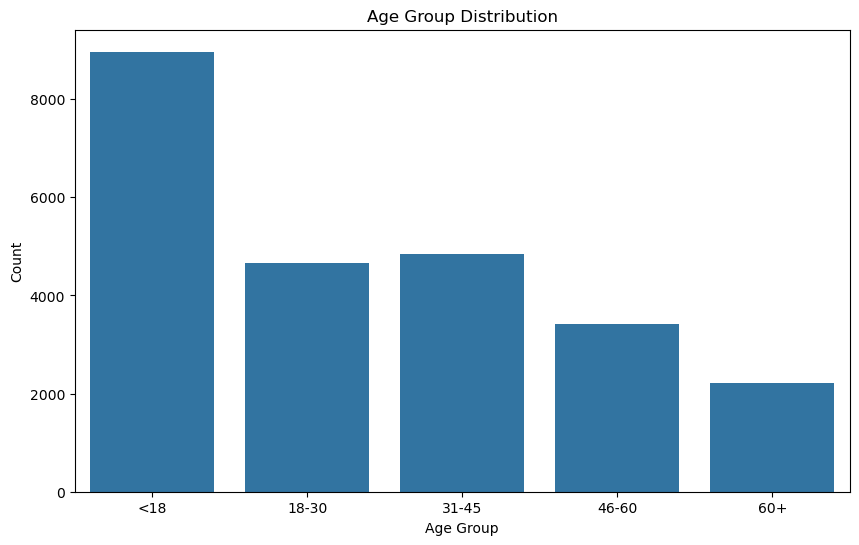

In [14]:
# Visualize Age Group Distribution from preprocessed vehicle data
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_vehicle_data, x='AgeGroup')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

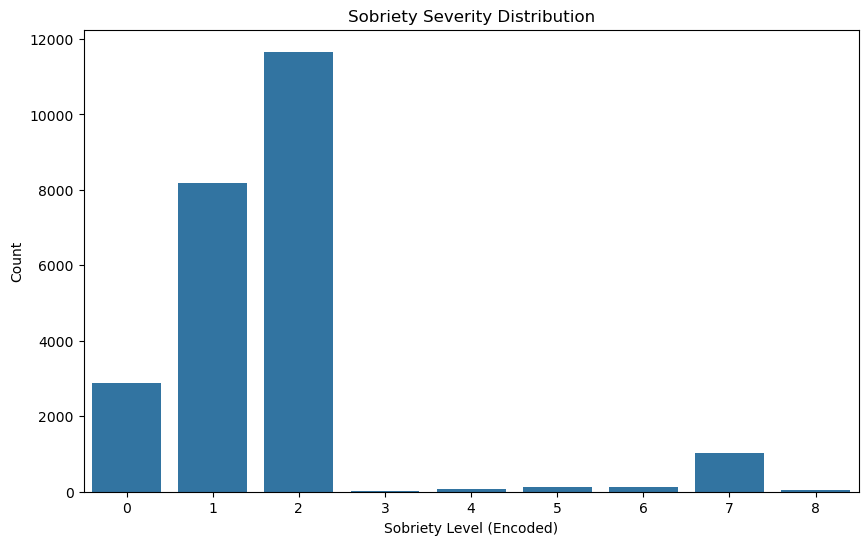

In [16]:
# Visualize Sobriety Severity Distribution from preprocessed vehicle data
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_vehicle_data, x='Sobriety_Code')
plt.title("Sobriety Severity Distribution")
plt.xlabel("Sobriety Level (Encoded)")
plt.ylabel("Count")
plt.show()

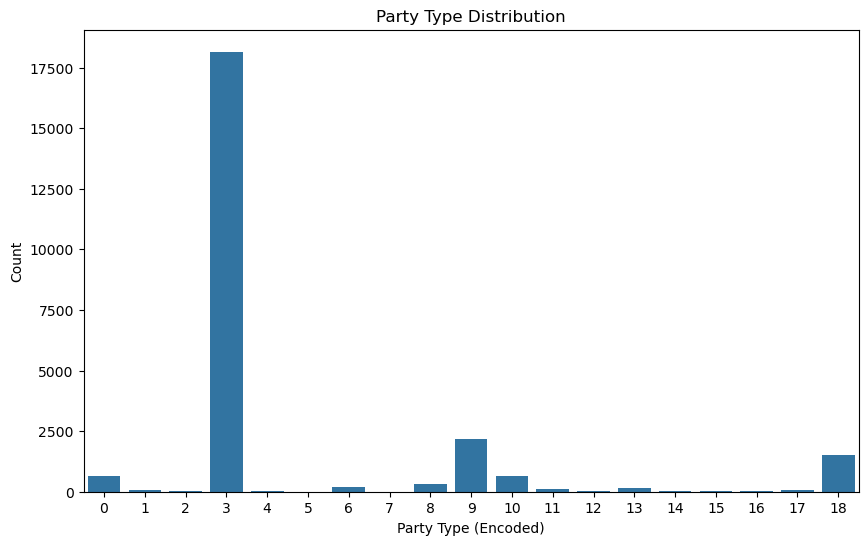

In [20]:
# Visualize Party Type Distribution from preprocessed vehicle data
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_vehicle_data, x='PartyType_Code')
plt.title("Party Type Distribution")
plt.xlabel("Party Type (Encoded)")
plt.ylabel("Count")
plt.show()

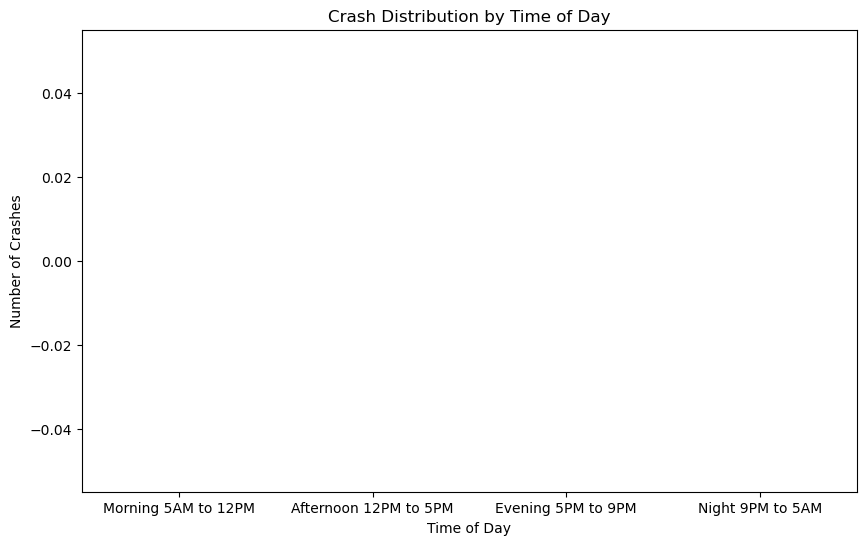

In [23]:
preprocessed_crashes_data['CrashTime'] = pd.to_datetime(preprocessed_crashes_data['CrashTime'], format='%H:%M', errors='coerce')

# Define a function to map times to parts of the day
def time_to_period(time):
    if time.hour >= 5 and time.hour < 12:
        return 'Morning 5AM to 12PM'
    elif time.hour >= 12 and time.hour < 17:
        return 'Afternoon 12PM to 5PM'
    elif time.hour >= 17 and time.hour < 21:
        return 'Evening 5PM to 9PM'
    else:
        return 'Night 9PM to 5AM'

# Apply the function to create a new column for time period
preprocessed_crashes_data['TimePeriod'] = preprocessed_crashes_data['CrashTime'].apply(time_to_period)

# Visualize the distribution of crashes by time period
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_crashes_data, x='TimePeriod', order=['Morning 5AM to 12PM', 'Afternoon 12PM to 5PM', 'Evening 5PM to 9PM', 'Night 9PM to 5AM'])
plt.title("Crash Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Crashes")
plt.show()